<a href="https://colab.research.google.com/github/joshimohitm9/Deep_Learning/blob/main/Graduate_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
df.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
218,219,324,110,4,3.0,3.5,8.97,1,0.84
312,313,311,107,4,4.5,4.5,9.00,1,0.78
24,25,336,119,5,4.0,3.5,9.80,1,0.97
475,476,300,101,3,3.5,2.5,7.88,0,0.59
146,147,315,105,3,2.0,2.5,8.48,0,0.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.shape

(500, 9)

In [6]:
df.drop(columns=["Serial No."],inplace=True)

In [7]:
from sklearn.model_selection  import train_test_split

In [8]:
x=df.iloc[:,:-1]
y=df["Chance of Admit "]

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=21,test_size=0.2)

In [10]:
x_train.shape,y_train.shape

((400, 7), (400,))

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model=Sequential()
model.add(Dense(7,activation="relu",input_dim=7))

model.add(Dense(5,activation="relu"))

model.add(Dense(3,activation="relu"))


model.add(Dense(1,activation="linear"))

In [61]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 7)                 56        
                                                                 
 dense_23 (Dense)            (None, 5)                 40        
                                                                 
 dense_24 (Dense)            (None, 3)                 18        
                                                                 
 dense_25 (Dense)            (None, 1)                 4         
                                                                 
Total params: 118 (472.00 Byte)
Trainable params: 118 (472.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:

model.compile(loss="mean_squared_error",optimizer="Adam",metrics=["Accuracy"])

In [63]:
history= model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.2366 - Accuracy: 0.0000e+00 - val_loss: 0.2111 - val_Accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1709 - Accuracy: 0.0000e+00 - val_loss: 0.1502 - val_Accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1127 - Accuracy: 0.0000e+00 - val_loss: 0.0992 - val_Accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0690 - Accuracy: 0.0000e+00 - val_loss: 0.0625 - val_Accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0413 - Accuracy: 0.0000e+00 - val_loss: 0.0420 - val_Accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0291 - Accuracy: 0.0000e+00 - val_loss: 0.0333 - val_Accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0254 - Accuracy: 0.0000e+00 - 

In [64]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [65]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6207128676520612

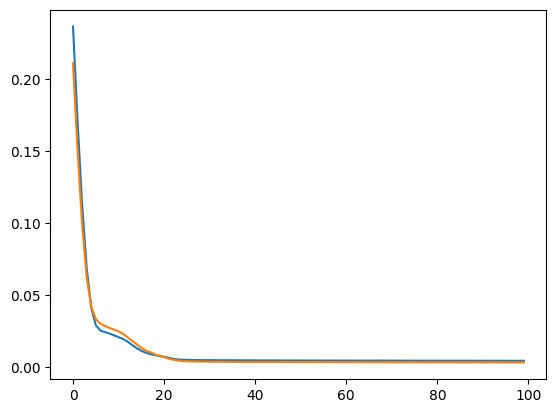

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])